In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import sklearn

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('temperature.csv')
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [4]:
df.shape

(7752, 25)

In [5]:
df.drop(["station","Date"],axis=1,inplace=True)

The above two columns are dropped as they does not have any impact on the analysis

**Exploratory Data Analysis**

In [6]:
df.describe()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,0.356080,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,0.258061,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,0.140615,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,0.312421,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,0.558694,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Present_Tmax      7682 non-null   float64
 1   Present_Tmin      7682 non-null   float64
 2   LDAPS_RHmin       7677 non-null   float64
 3   LDAPS_RHmax       7677 non-null   float64
 4   LDAPS_Tmax_lapse  7677 non-null   float64
 5   LDAPS_Tmin_lapse  7677 non-null   float64
 6   LDAPS_WS          7677 non-null   float64
 7   LDAPS_LH          7677 non-null   float64
 8   LDAPS_CC1         7677 non-null   float64
 9   LDAPS_CC2         7677 non-null   float64
 10  LDAPS_CC3         7677 non-null   float64
 11  LDAPS_CC4         7677 non-null   float64
 12  LDAPS_PPT1        7677 non-null   float64
 13  LDAPS_PPT2        7677 non-null   float64
 14  LDAPS_PPT3        7677 non-null   float64
 15  LDAPS_PPT4        7677 non-null   float64
 16  lat               7752 non-null   float64


***Check for duplicates***

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape 

(7752, 23)

There is no change in shape so there are no duplicates

***Check for null values***

In [10]:
df.isnull().sum()

Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [11]:
df.dropna(inplace=True)

In [11]:
for i in df.columns:
    df[i].fillna(df[i].median(),inplace=True)

In [12]:
df.shape #there is no much change in the shape its fine

(7752, 23)

In [13]:
df.isnull().sum()

Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

All the null values are replaced

***check for outliers***

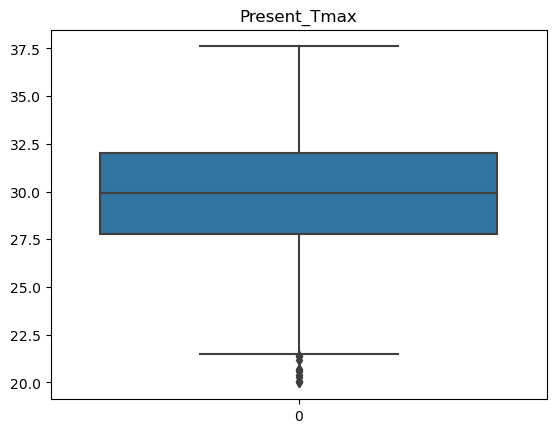

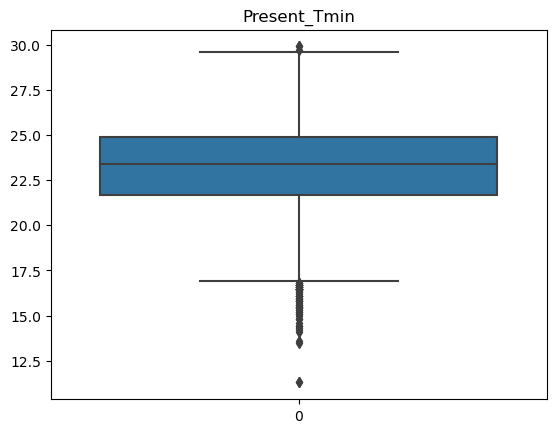

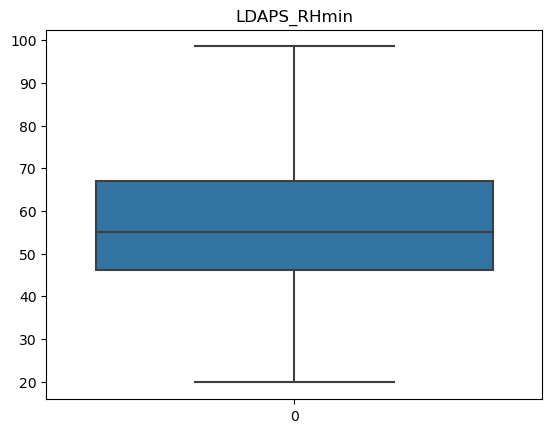

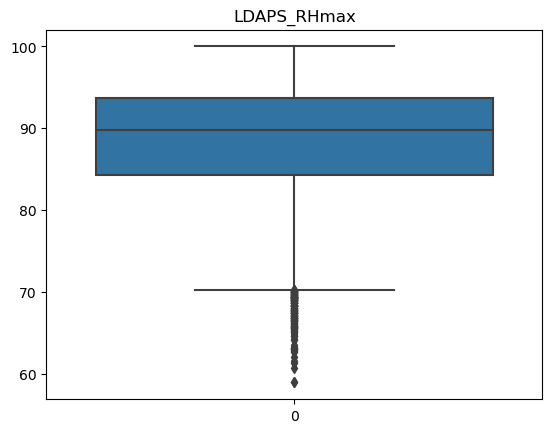

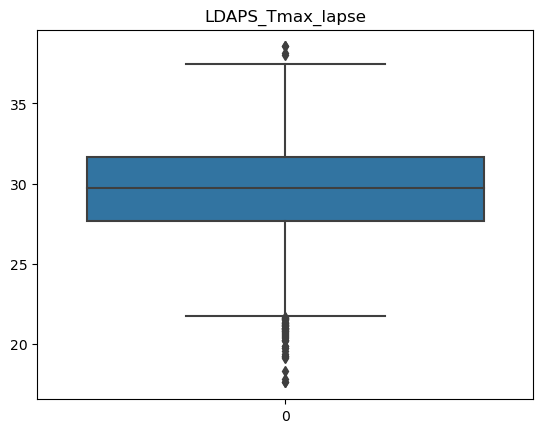

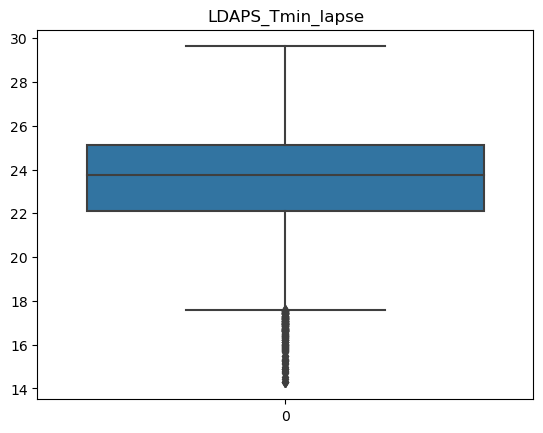

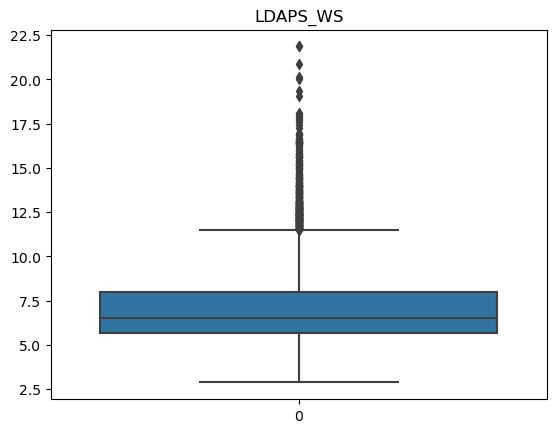

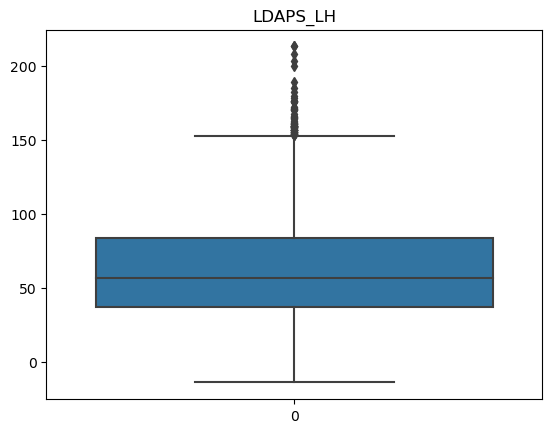

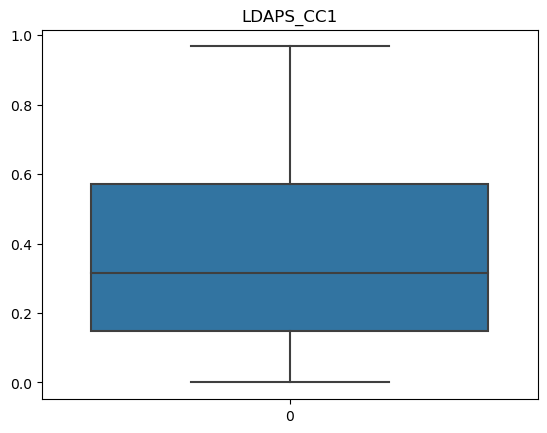

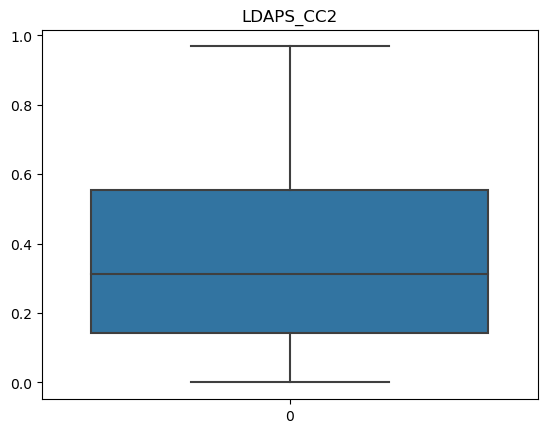

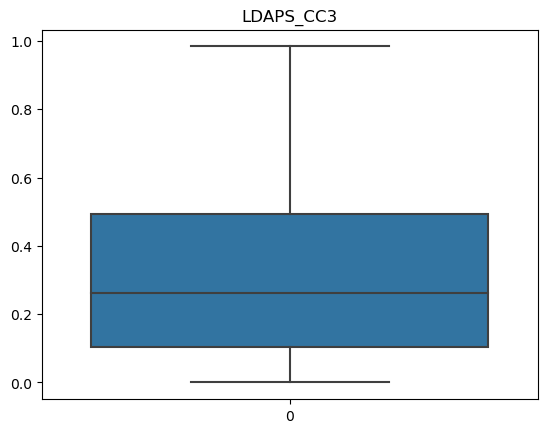

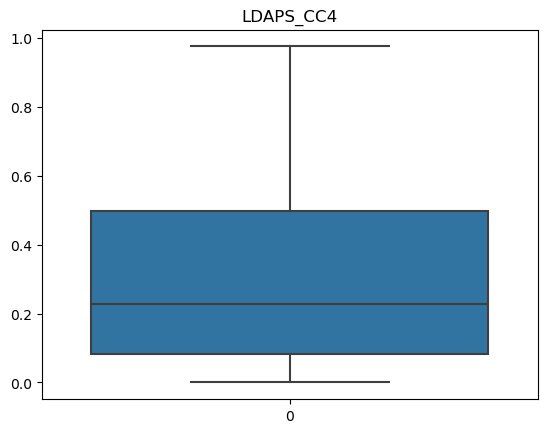

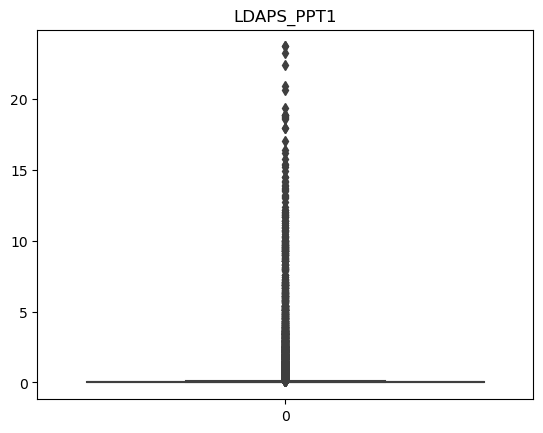

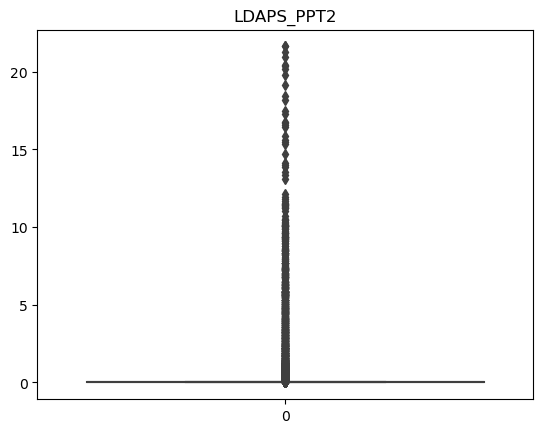

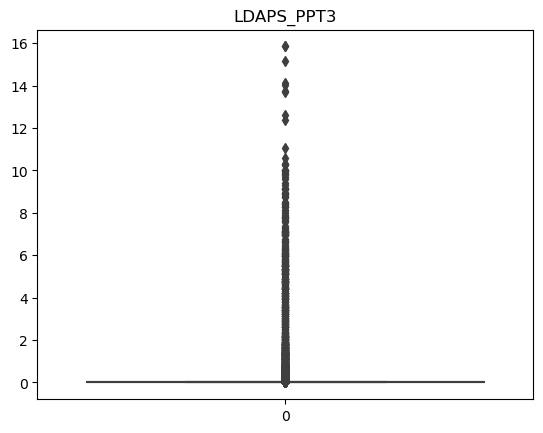

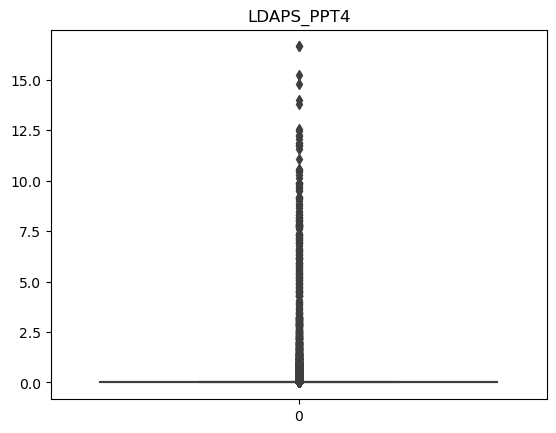

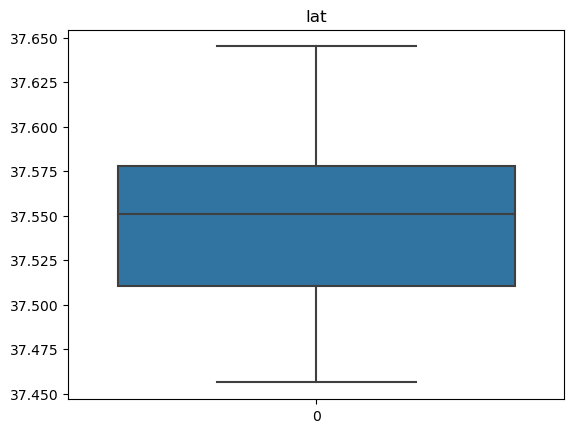

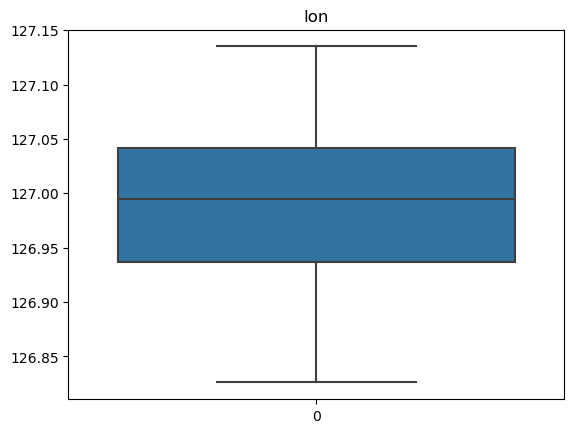

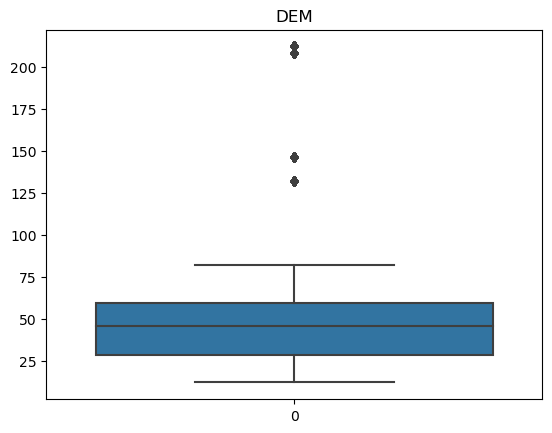

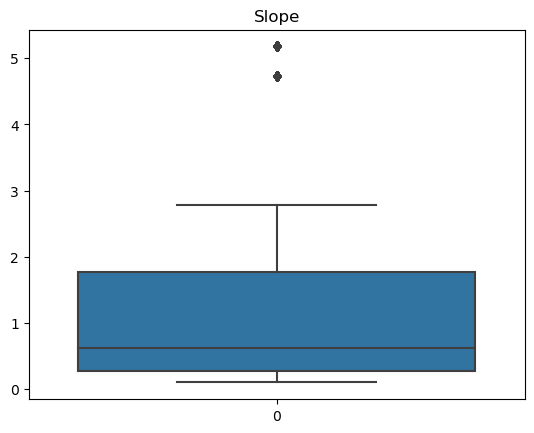

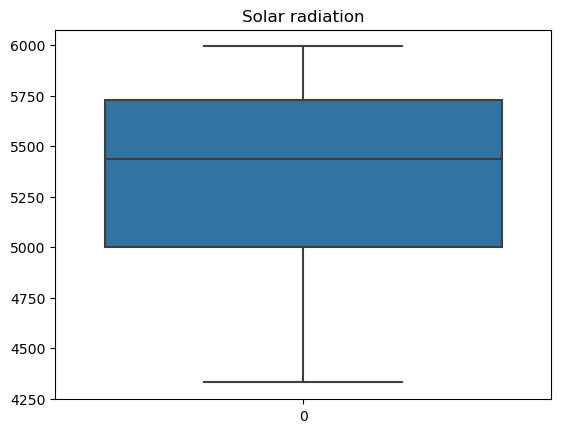

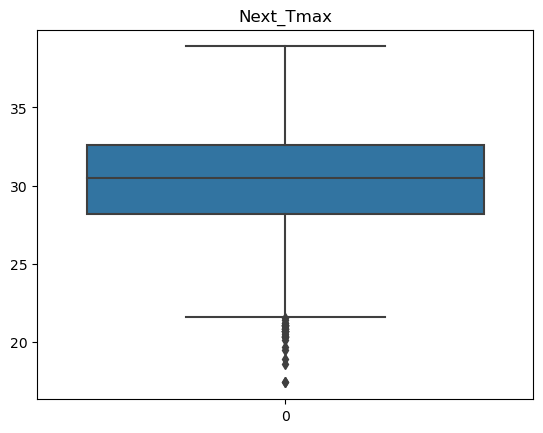

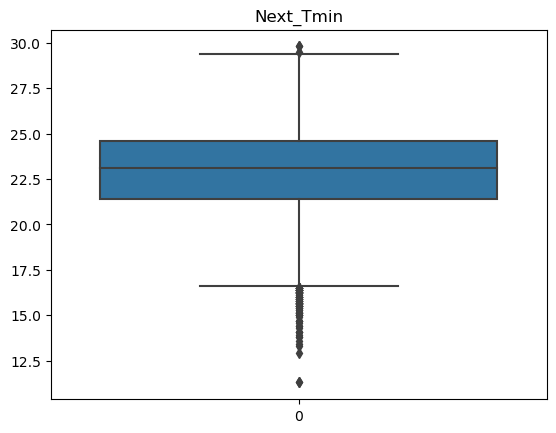

In [14]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()


In [15]:
for i in df.columns:
    IQR=df[i].quantile(0.75)-df[i].quantile(0.25)

    Q1=df[i].quantile(0.25)

    Q2=df[i].quantile(0.75)

    lowl=Q1-1.5*IQR
    print(lowl)
    upperl=Q2+1.5*IQR
    print(upperl)
    
    new_df=df[i].copy()
    
    new_df=np.where(new_df > upperl , upperl ,
                           np.where(new_df <lowl, lowl ,new_df
                                   )
                           )
    df[i]=new_df

21.5
38.3
16.9
29.699999999999996
14.55802344375001
98.52639199375
70.23555755374998
107.78586578375003
21.707000612499996
37.6699093925
17.585628087499998
29.663023527500002
2.205011355124999
11.488946982125
-32.024967957499996
153.4623182625
-0.48674113762500004
1.2067590053750001
-0.47662374987500006
1.173915553125
-0.48326046387500005
1.080367879125
-0.5389934523750001
1.118964540625
-0.07368254625000001
0.12280424375000001
-0.0251218605
0.0418697675
-0.01084654875
0.018077581250000002
0.0
0.0
37.409099999999995
37.67869999999999
126.77949999999998
127.1995
-17.9986
106.531
-1.9734500000000001
4.01255
3905.0717784999993
6822.263182500001
21.599999999999994
39.2
16.599999999999994
29.400000000000006


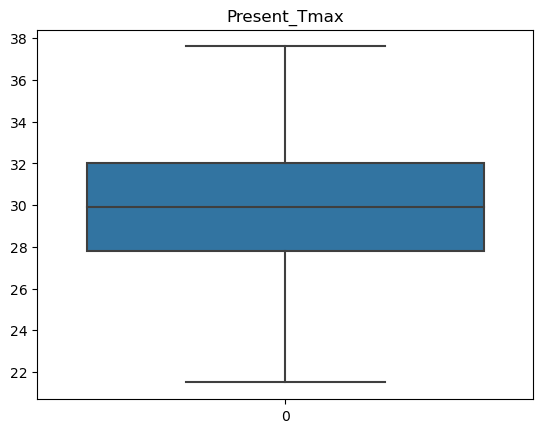

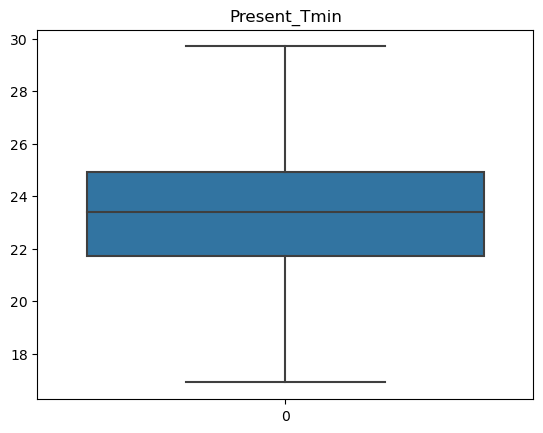

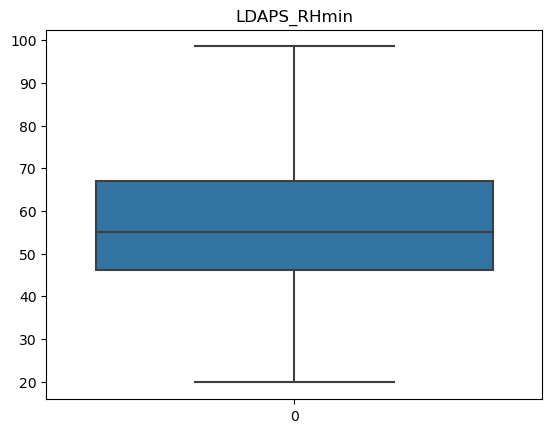

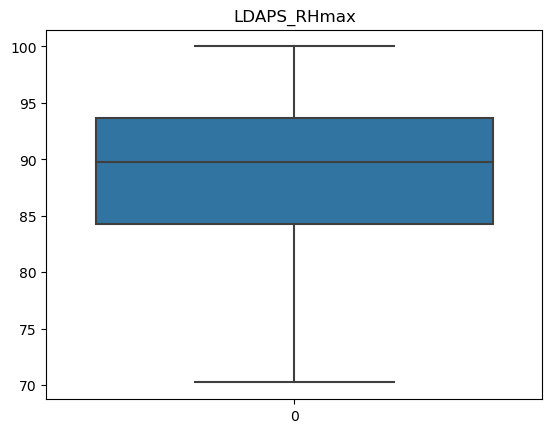

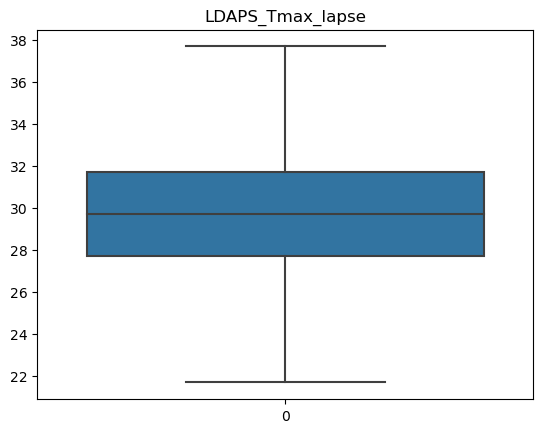

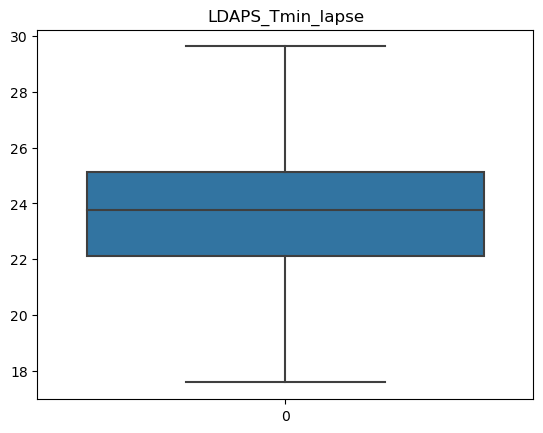

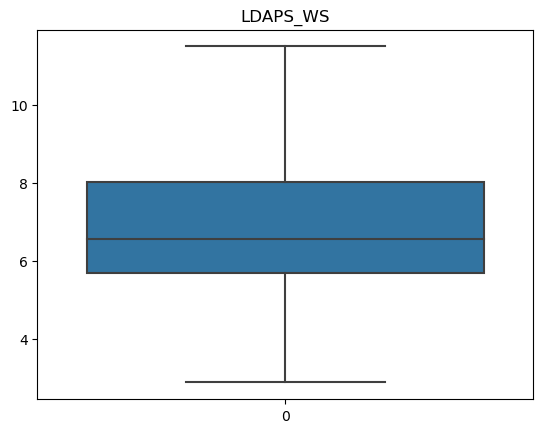

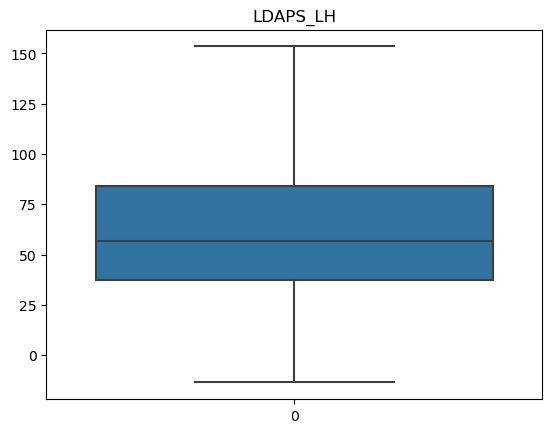

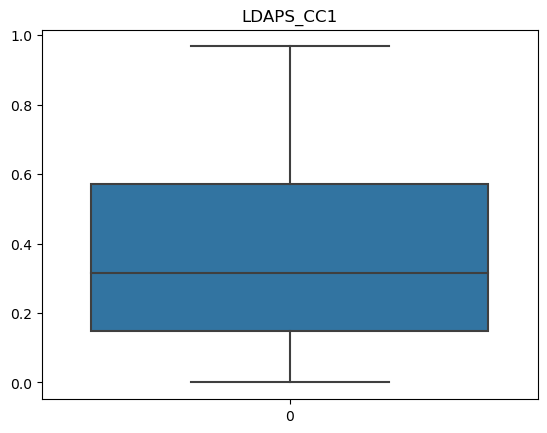

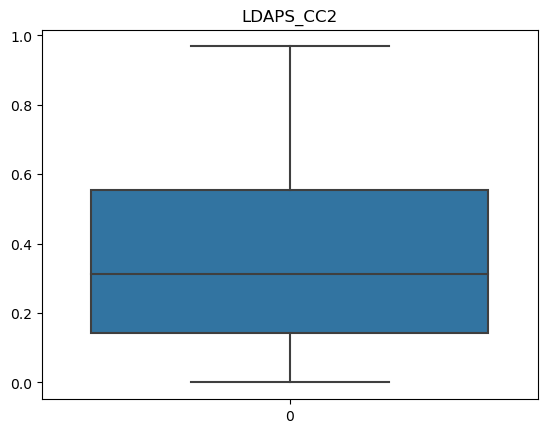

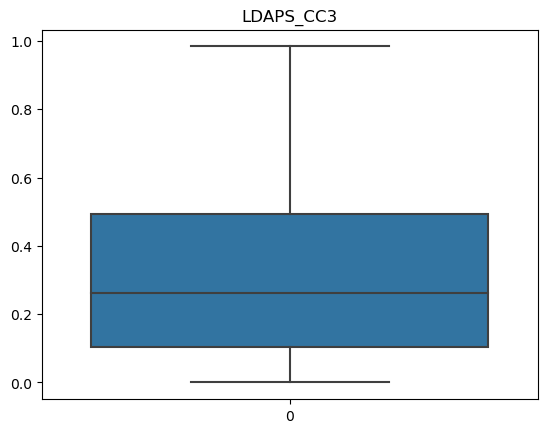

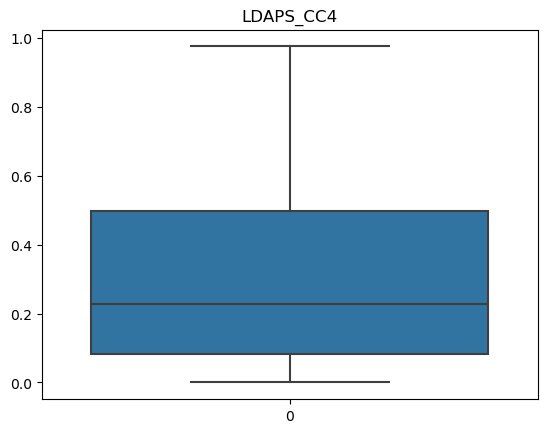

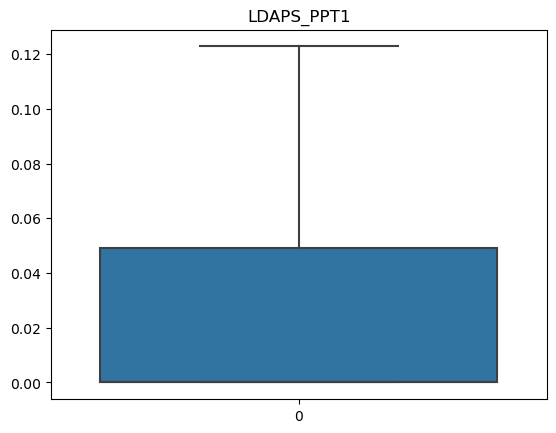

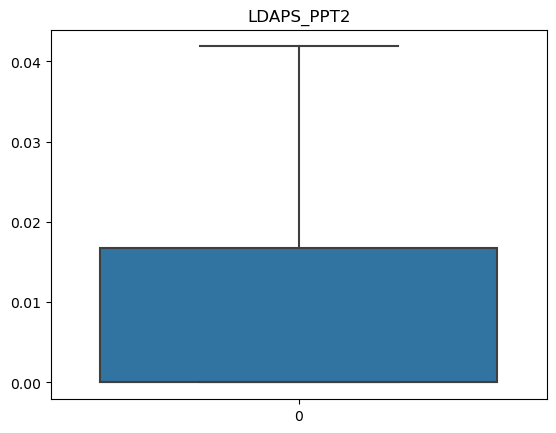

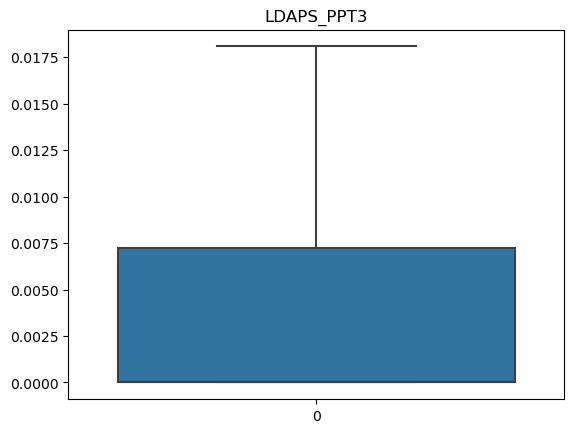

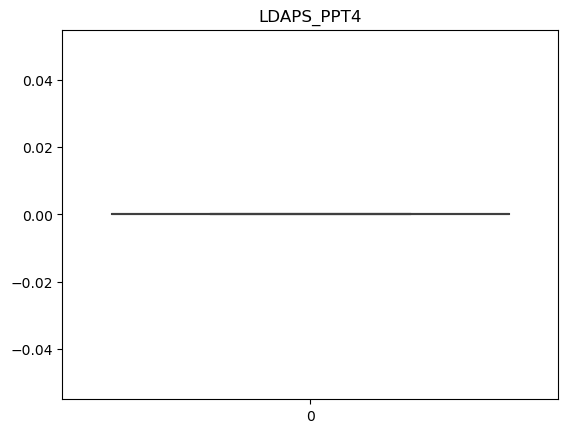

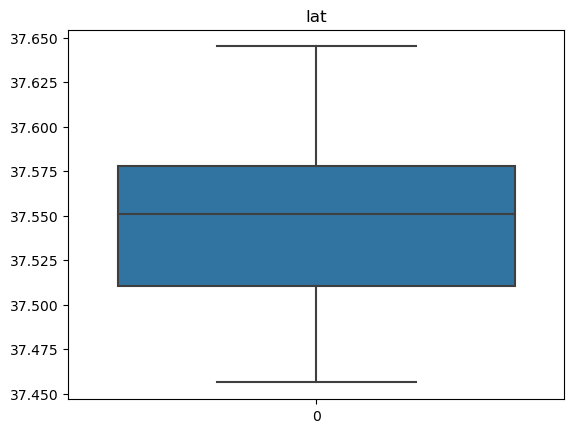

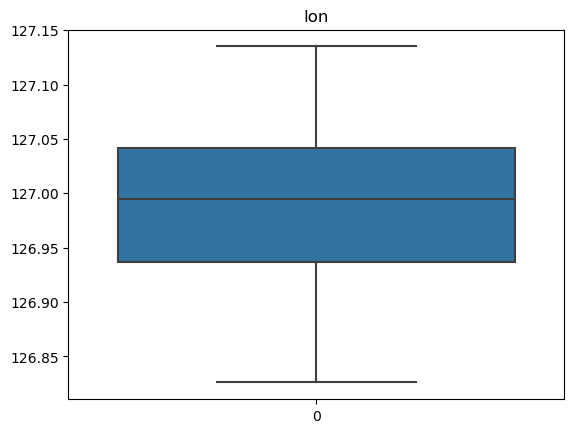

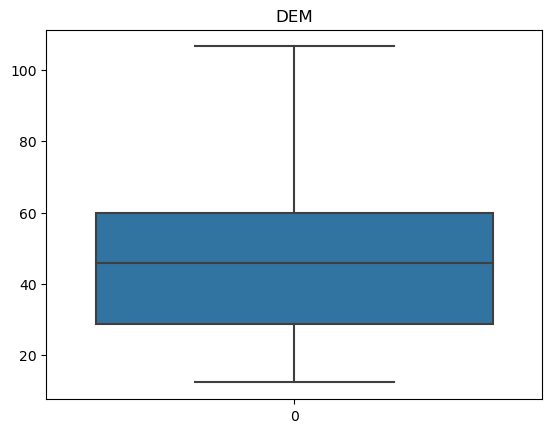

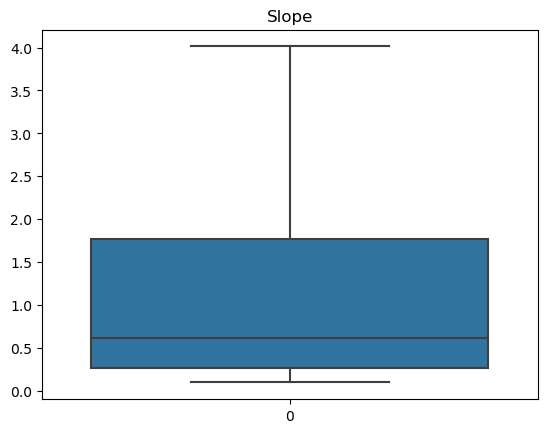

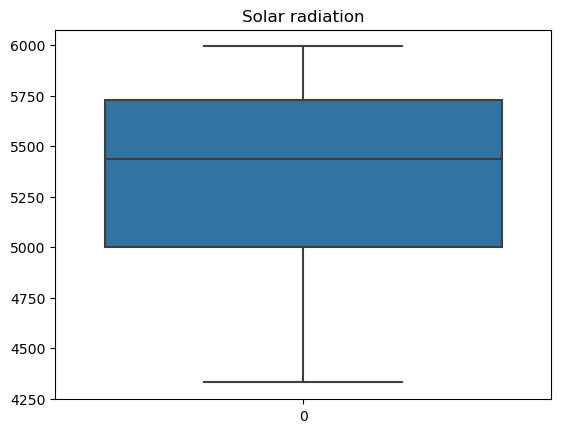

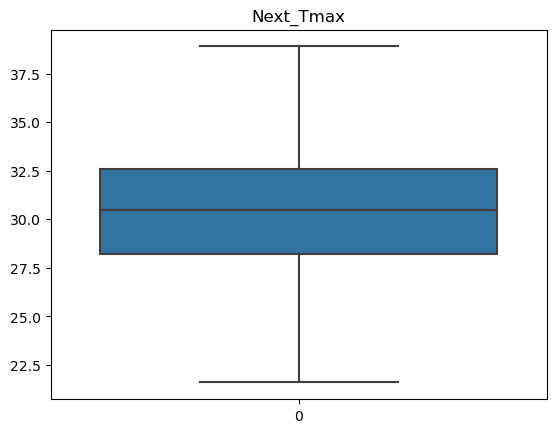

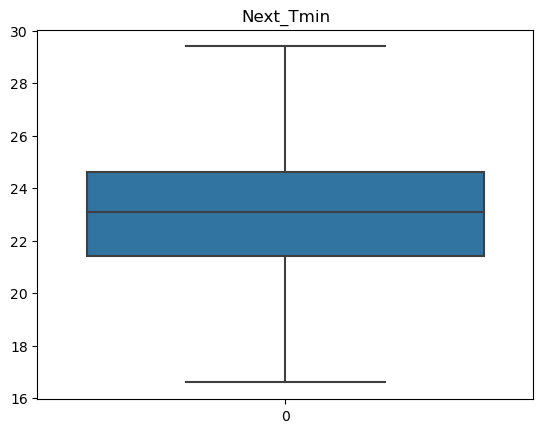

In [16]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

So the outliers which are present in some of the features are also removed

***check for skewness***

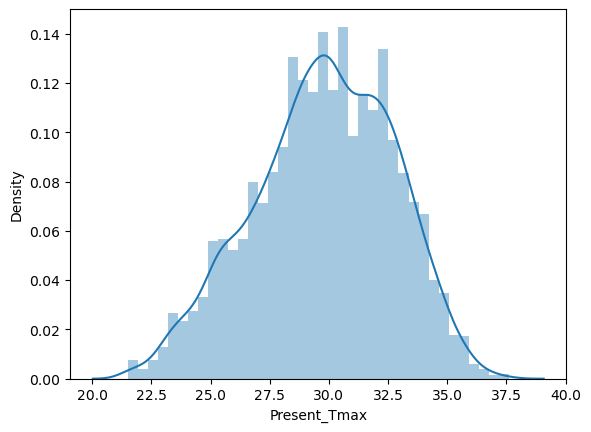

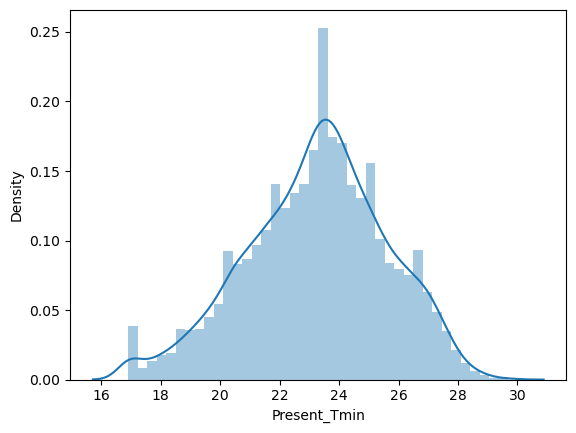

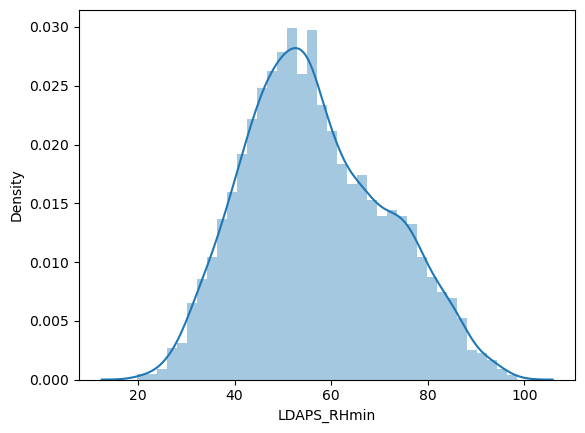

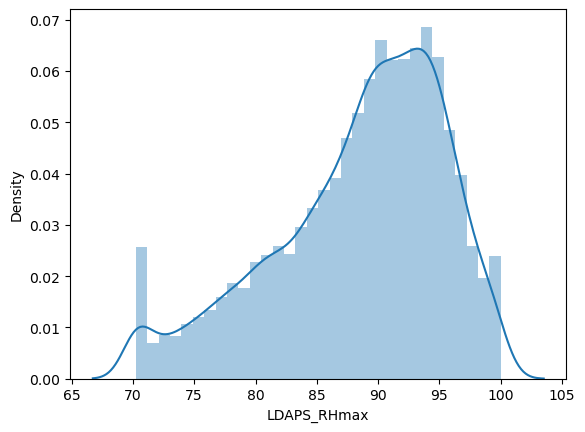

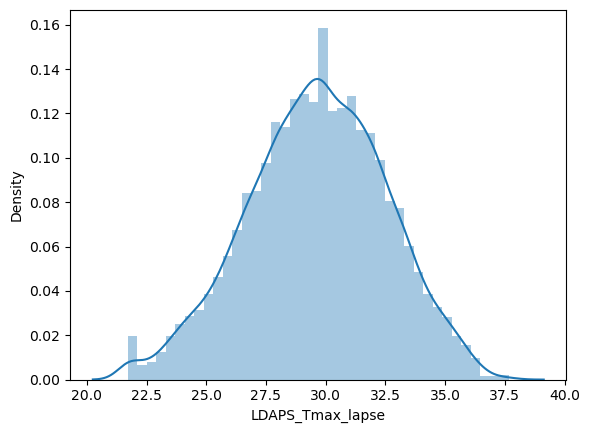

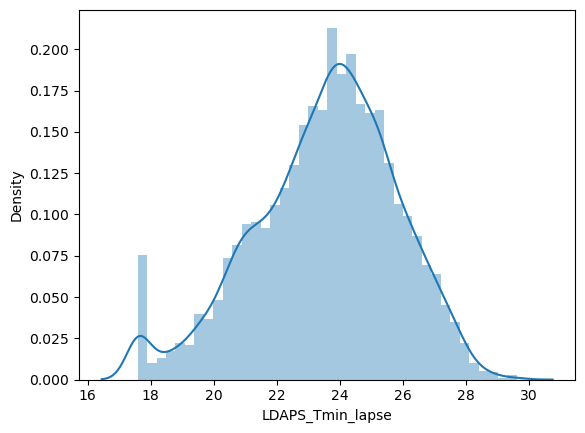

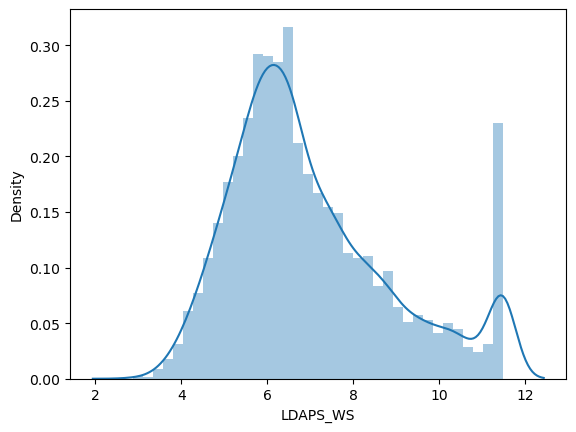

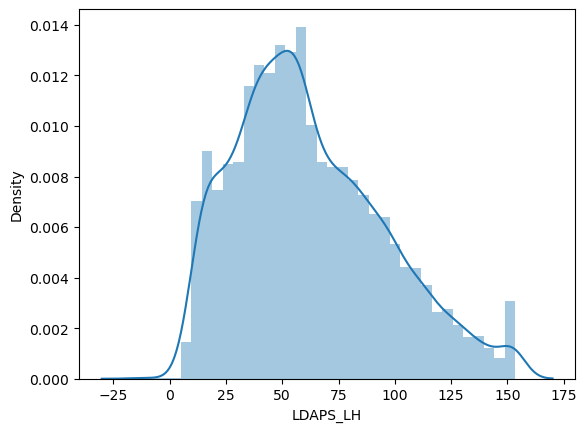

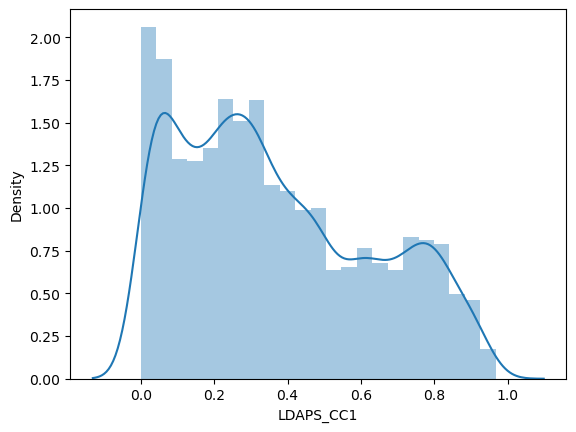

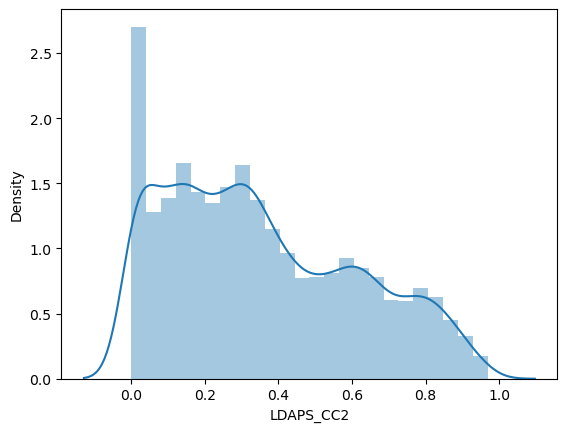

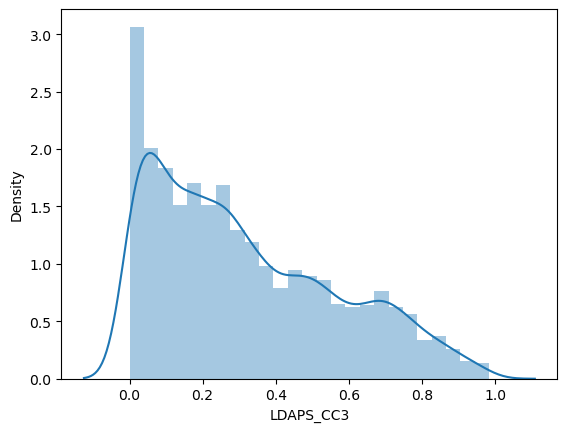

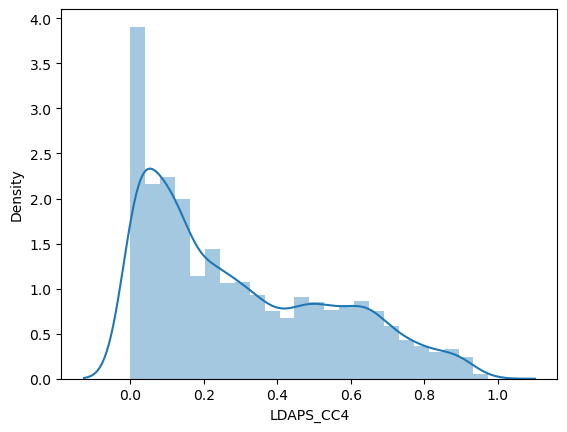

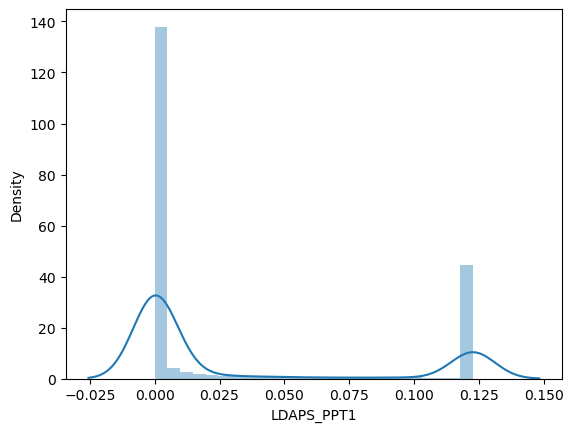

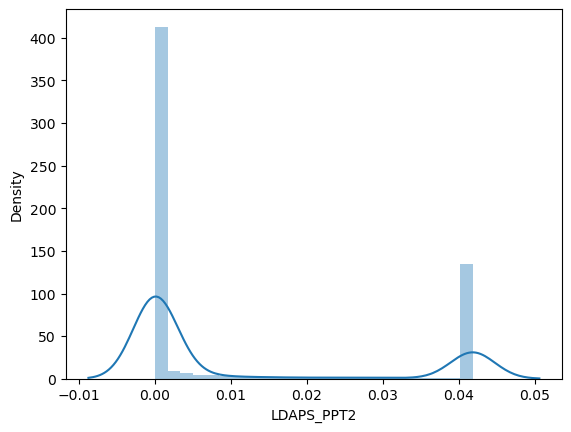

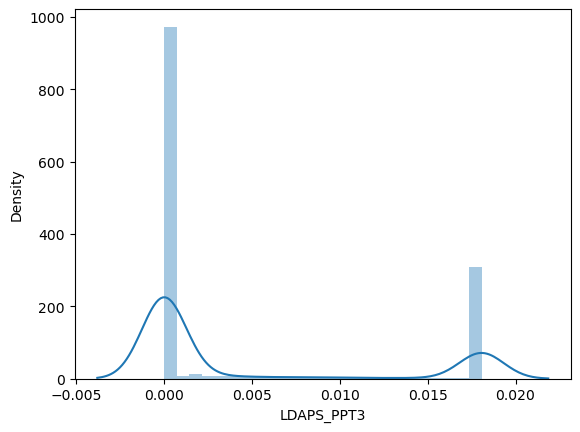

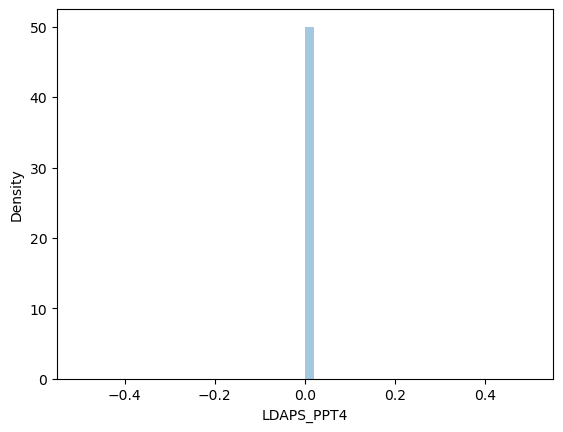

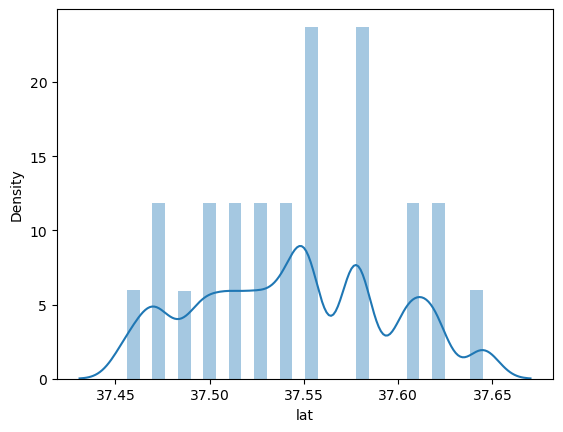

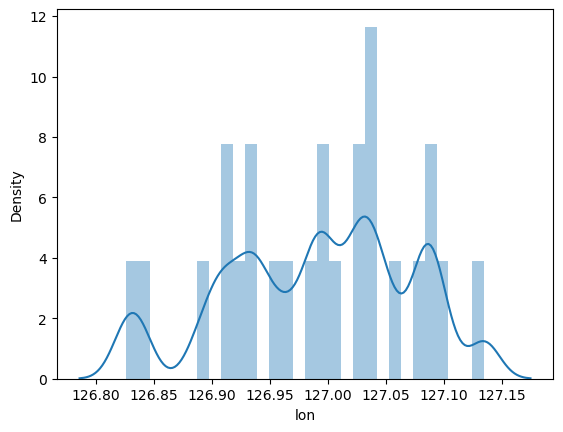

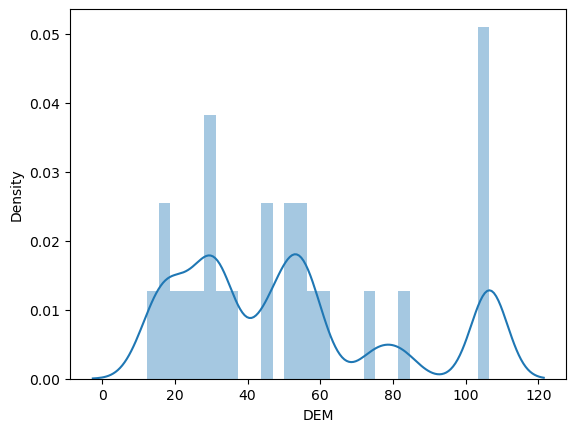

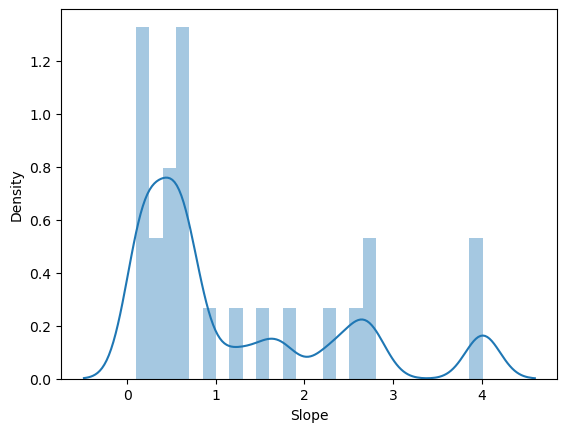

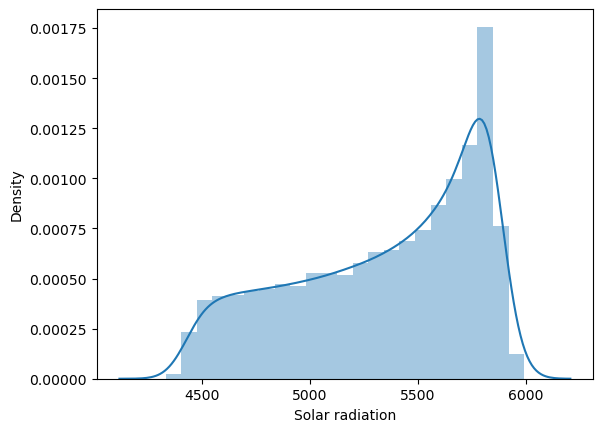

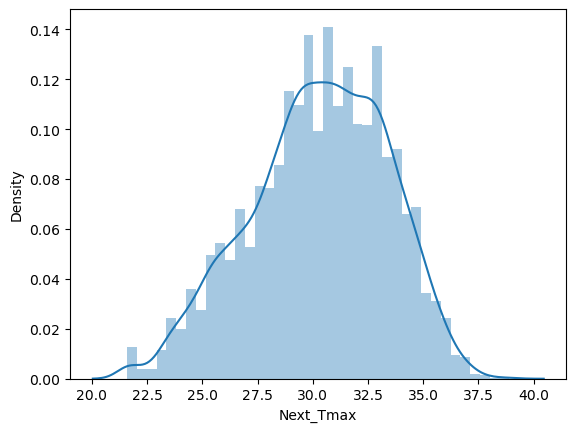

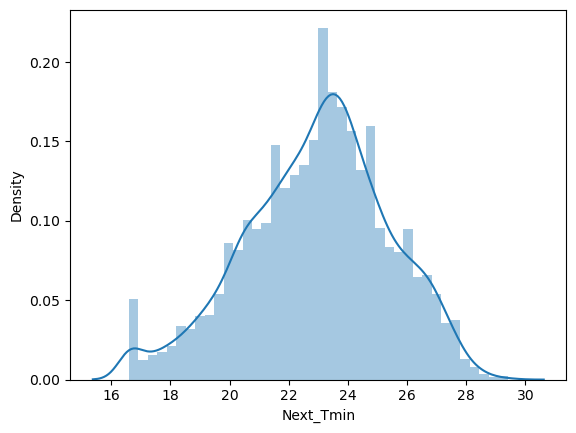

In [17]:
for i in df.columns:
    sns.distplot(df[i],kde=True)
    plt.show()

Transformation to get rid of skewness

In [18]:
for i in df.columns:
    df[i] = np.sqrt(df[i])

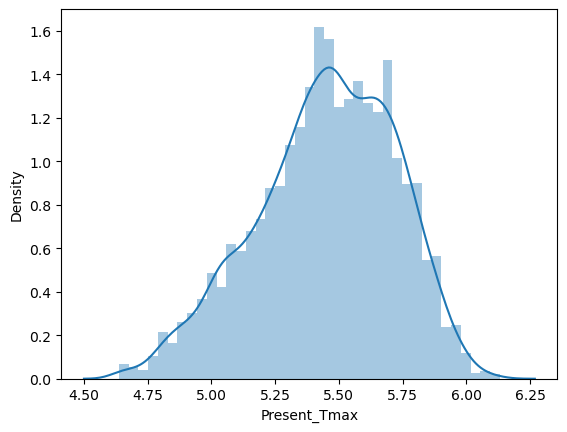

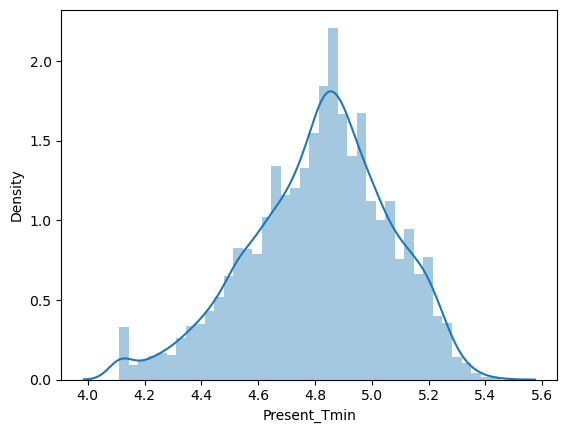

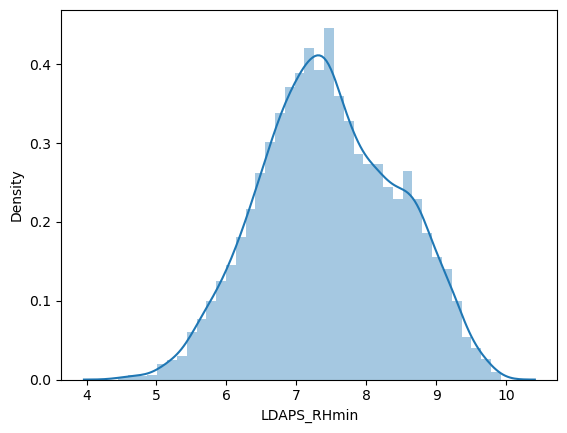

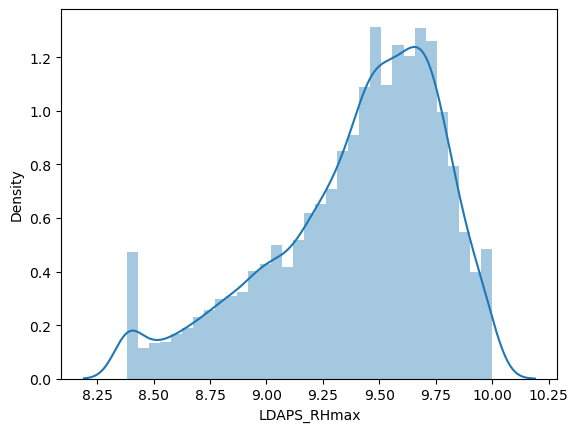

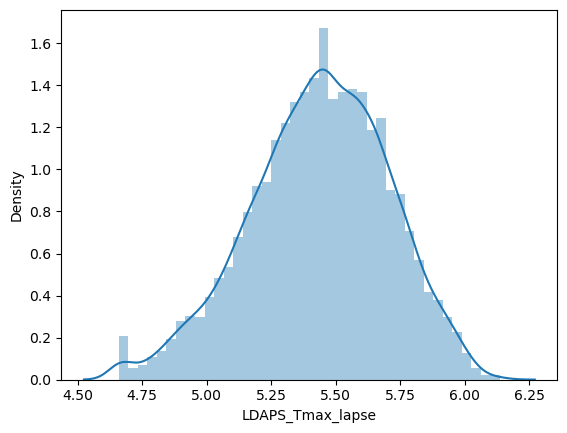

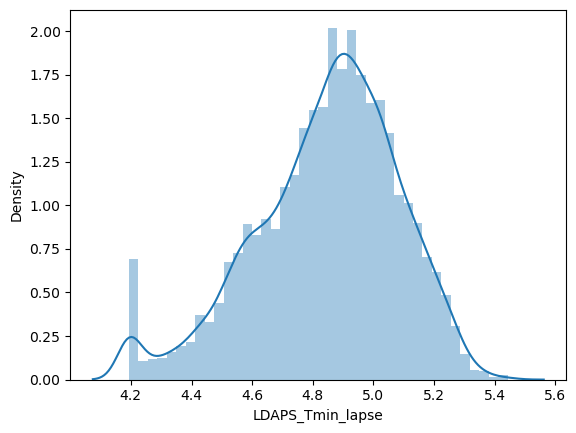

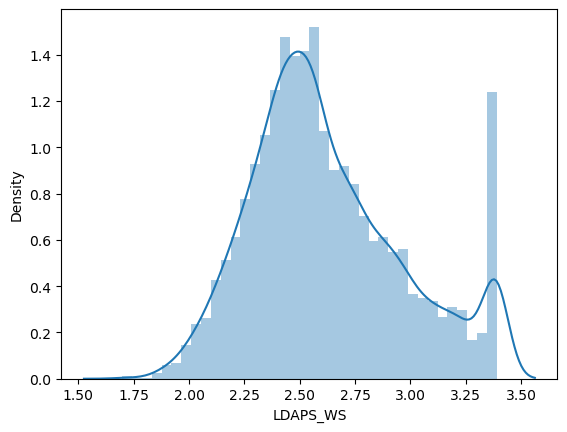

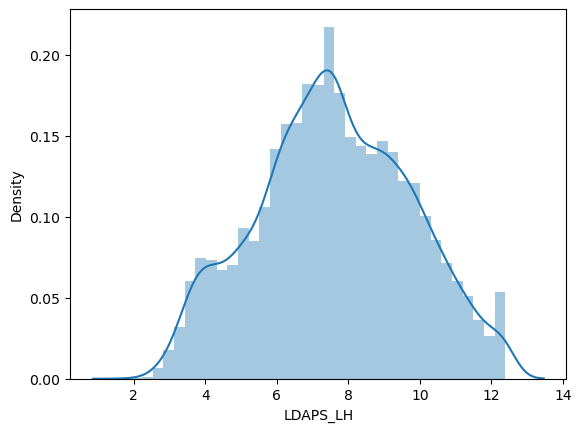

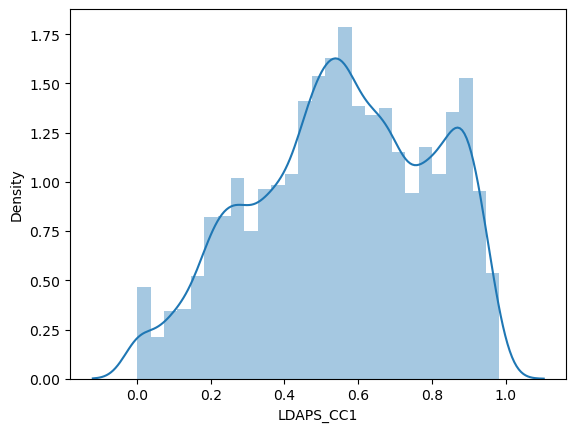

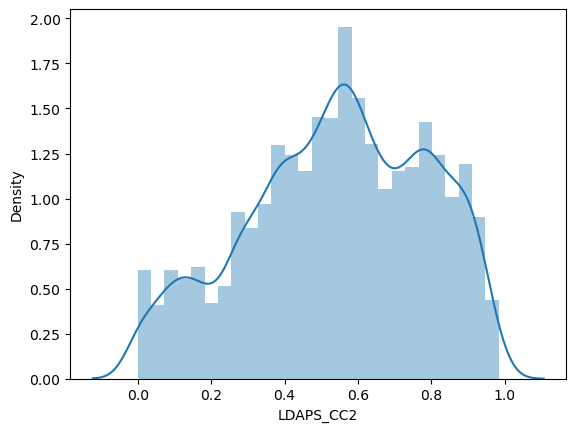

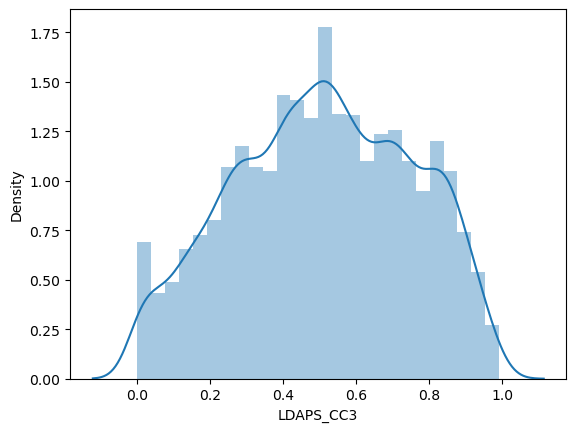

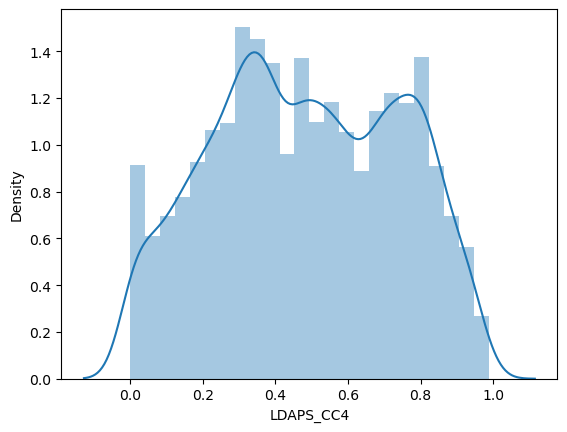

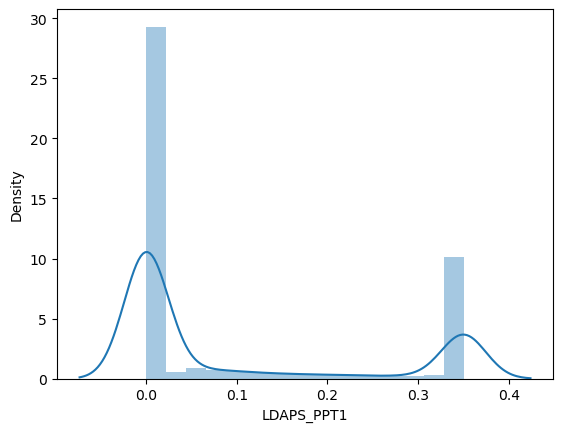

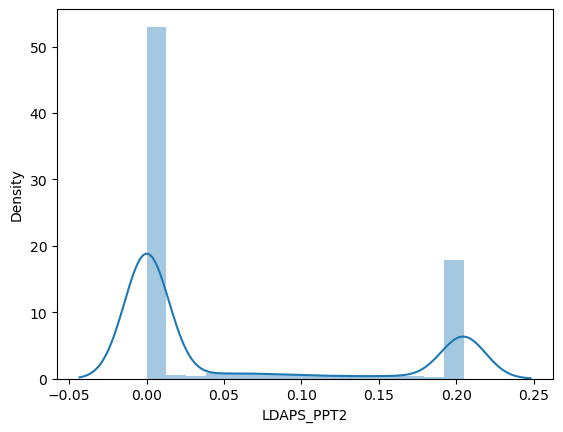

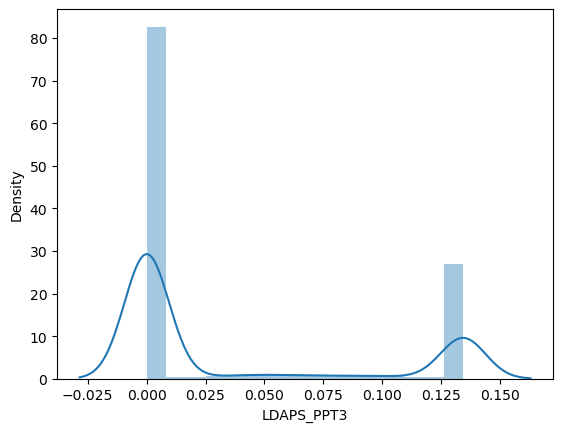

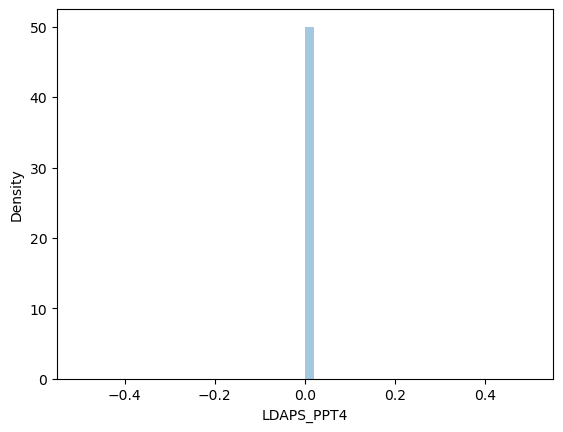

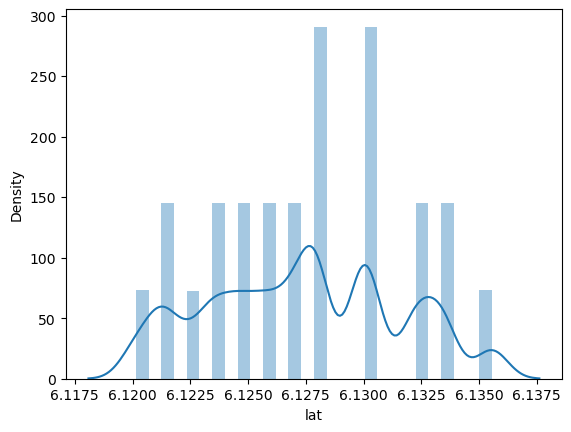

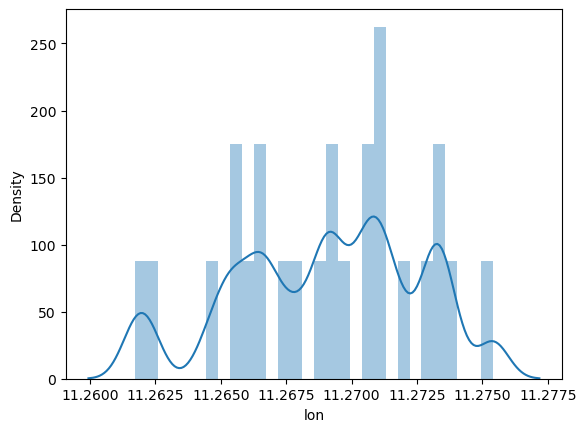

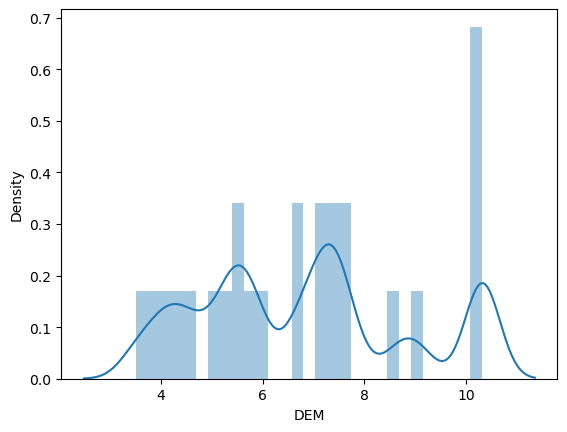

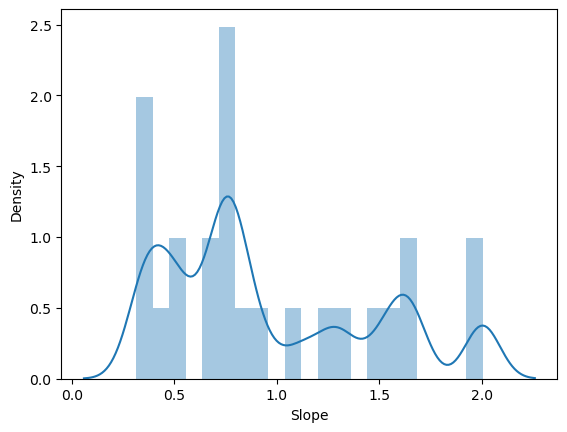

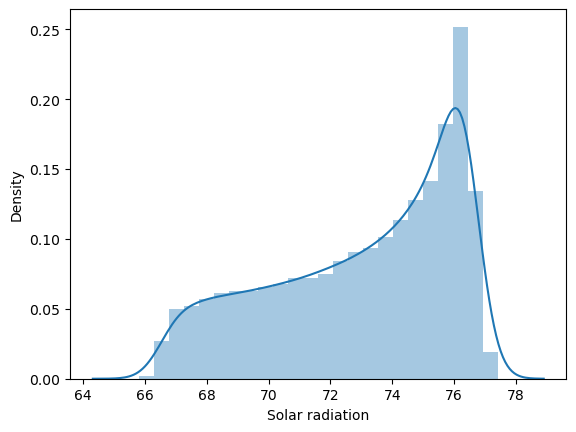

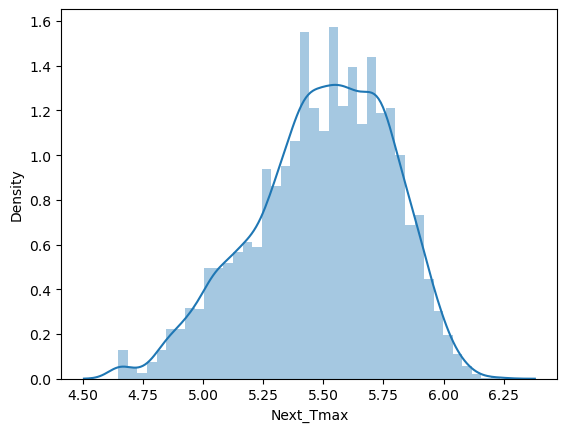

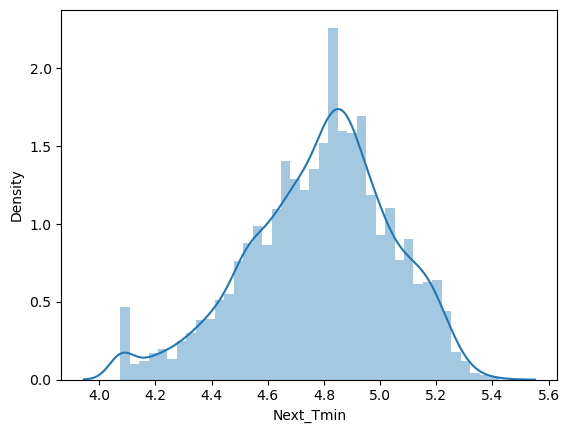

In [19]:
for i in df.columns:
    sns.distplot(df[i],kde=True)
    plt.show()

Skewness is managed

***Check for Correlation between feautures***

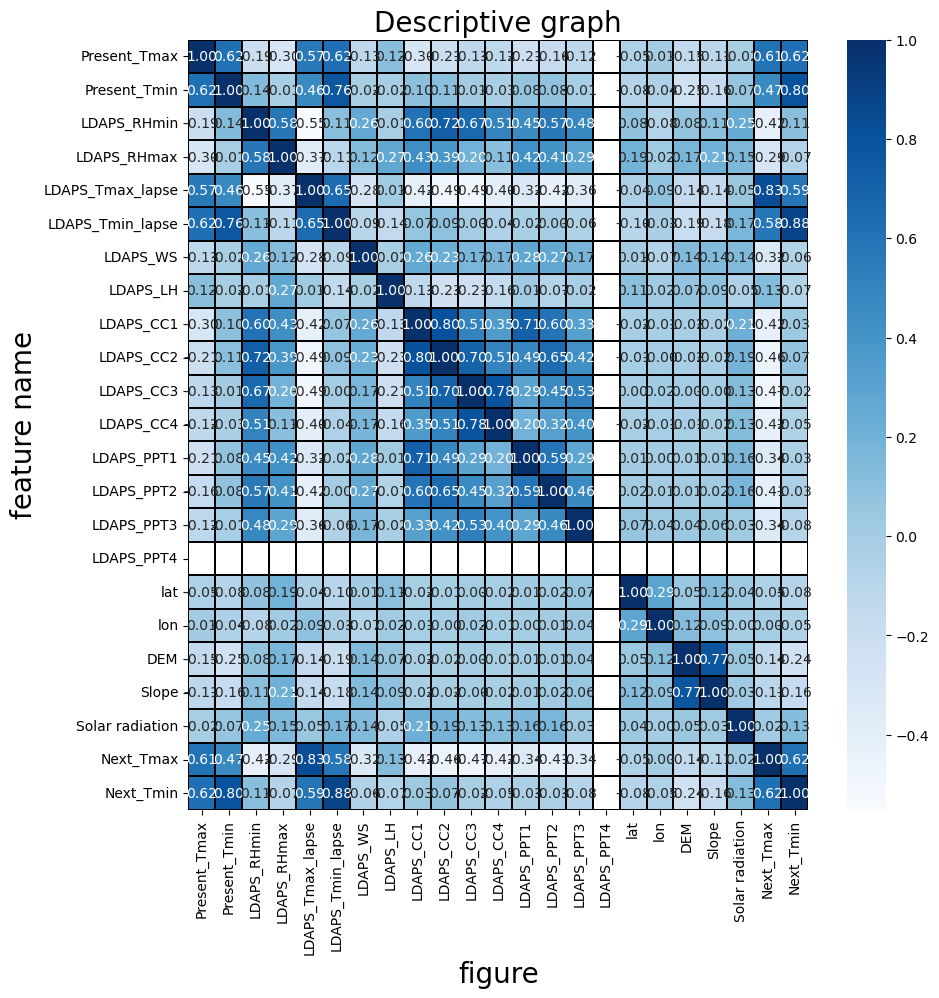

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Blues')
plt.xlabel('figure',fontsize=20)
plt.ylabel('feature name',fontsize=20)
plt.title('Descriptive graph',fontsize=20)
plt.show()

In [24]:
df.isnull().sum()

Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            4
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [25]:
df.dropna(inplace=True)

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor #importing of VIF

In [27]:
def calc_vif(df):
    vif=pd.DataFrame()
    vif['Variables']=df.columns
    vif['VIF FACTOR']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return(vif)

In [32]:
calc_vif(df)

,Variables,VIF FACTOR
0,Present_Tmax,1.147919e+03
1,Present_Tmin,1.274968e+03
2,LDAPS_RHmin,3.573608e+02
3,LDAPS_RHmax,1.385495e+03
4,LDAPS_Tmax_lapse,3.329315e+03
5,LDAPS_Tmin_lapse,3.855855e+03
6,LDAPS_LH,2.013060e+01
7,LDAPS_CC1,3.243305e+01
8,LDAPS_CC2,3.322587e+01
9,LDAPS_CC3,2.520095e+01


In [31]:
df.drop("Solar radiation",axis=1,inplace=True)

So there is no much inflation in the variance its okay

***REGRESSION MODEL***

***check of correlation with the features with the target***

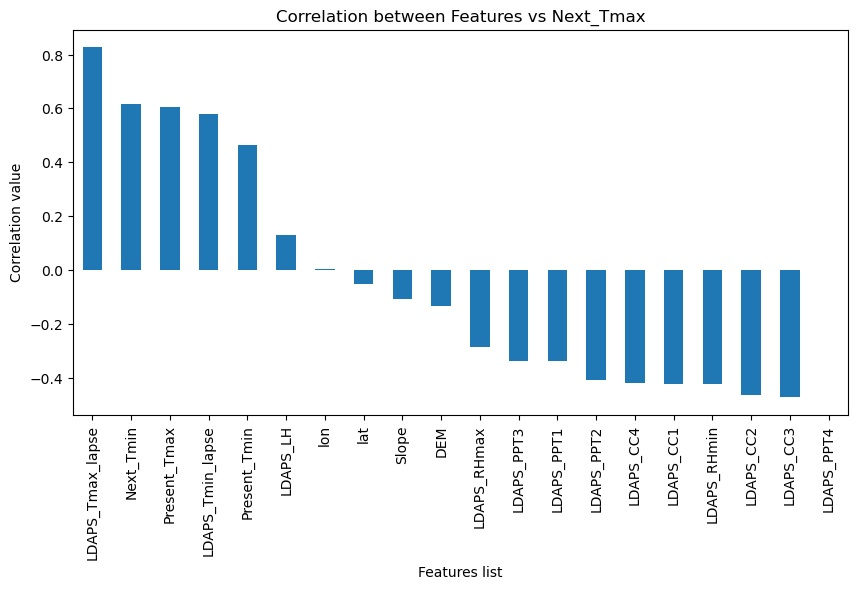

In [33]:
df_corr=df.corr()
plt.figure(figsize=(10,5))
df_corr['Next_Tmax'].sort_values(ascending=False).drop('Next_Tmax').plot.bar()
plt.title("Correlation between Features vs Next_Tmax")
plt.xlabel('Features list')
plt.ylabel('Correlation value')
plt.show()

In [34]:
df_new=df.drop(['lon','lat','Slope'],axis=1)

**NEXT DAY MAXIMUM TEMPERATURE MODEL**

***Splitting of data into features and target***

In [35]:
x=df_new.drop(['Next_Tmax','Next_Tmin'],axis=1)
y=df_new['Next_Tmax']

***Scaling or standardization of parameters***

In [36]:
scaler=StandardScaler()
X=scaler.fit_transform(x)
X

array([[-0.33823484, -0.75774956,  0.1681673 , ..., -0.6267096 ,
         0.        ,  1.69202659],
       [ 0.72630308, -0.67093367, -0.24686098, ..., -0.6267096 ,
         0.        , -0.06754478],
       [ 0.62884193,  0.05134686, -0.50572595, ..., -0.6267096 ,
         0.        , -0.51302893],
       ...,
       [-2.27945966, -2.44392749, -2.64132926, ..., -0.6267096 ,
         0.        , -1.29441447],
       [-2.31742347, -2.58806399, -2.75896455, ..., -0.6267096 ,
         0.        , -1.16520403],
       [ 2.49781659,  2.55826579,  2.52887676, ...,  1.73785966,
         0.        ,  1.69202659]])

***Find the best random score***

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [39]:
lr=LinearRegression()
maxAcc=0
rs=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    ac=r2_score(y_test,pred)
    if ac>maxAcc:
        maxAcc=ac
        rs=i
        
print("Best score ",maxAcc)
print("random state ",rs)

Best score  0.7684519046518127
random state  63


In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [41]:
def Regression(lr,x,y):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=63)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)
    print("R2 score for test data:",r2_score(y_test,pred_test))
    print("R2 score train data :",r2_score(y_train,pred_train)*100)
    print("Mean absolute error:",mean_absolute_error(y_test,pred_test))
    print("Mean squared error:",mean_squared_error(y_test,pred_test))
    print("Root Mean squared error:",np.sqrt(mean_absolute_error(y_test,pred_test)))

In [46]:
lr=LinearRegression()
Regression(lr,x,y)

R2 score for test data: 0.7515390441537362
R2 score train data : 74.86418597267107
Mean absolute error: 0.10753462152546832
Mean squared error: 0.020548530818517236
Root Mean squared error: 0.32792471929616457


In [47]:
lr=RandomForestRegressor()
Regression(lr,x,y)

R2 score for test data: 0.8733683782435744
R2 score train data : 98.26087764018773
Mean absolute error: 0.07635137043419449
Mean squared error: 0.0104728478299455
Root Mean squared error: 0.27631751742188637


In [48]:
lr=KNN()
Regression(lr,x,y)

R2 score for test data: 0.8728896465677952
R2 score train data : 91.68691599055478
Mean absolute error: 0.07518418500459496
Mean squared error: 0.010512440499787902
Root Mean squared error: 0.27419734682267616


In [49]:
lr=Ridge()
Regression(lr,x,y)

R2 score for test data: 0.7515468736325411
R2 score train data : 74.86417500629719
Mean absolute error: 0.10753185682927809
Mean squared error: 0.020547883295102664
Root Mean squared error: 0.3279205038256652


In [50]:
lr=Lasso()
Regression(lr,x,y)

R2 score for test data: -0.0009779956514992527
R2 score train data : 0.0
Mean absolute error: 0.23436498833941036
Mean squared error: 0.08278414257179852
Root Mean squared error: 0.4841125781669077


Out of these the RandomForestRegressor is giving good results

***Hyperparameter tuning for regression***

In [51]:
from sklearn.model_selection import GridSearchCV

In [59]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=63)

model = RandomForestRegressor()
param_grid = {
    'n_estimators': [100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test Set Score:", test_score)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.86783646125758
Test Set Score: 0.8921698854657054


In [60]:
best_model = RandomForestRegressor(n_estimators=100,max_depth=20,min_samples_split=2,min_samples_leaf=1)

best_model.fit(x_train, y_train)

y_pred = best_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", mse)
print(best_model.score(x_test, y_test))

Test MSE: 0.009141306097490292
0.8915091273801933


So we got our best_model with the best parameters,now we will save the model

***saving the model***

In [61]:
import joblib

joblib.dump(best_model, 'next_day_temperature.joblib')

['next_day_temperature.joblib']

In [62]:
loaded_model = joblib.load('next_day_temperature.joblib')

In [69]:
x

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM
0,5.357238,4.626013,7.632541,9.545489,5.298500,4.796555,8.333775,0.483681,0.451548,0.402115,0.361840,0.000000,0.000000,0.000000,0.0,10.321386
1,5.648008,4.647580,7.229343,9.518651,5.463578,4.902551,7.206764,0.474877,0.501768,0.399304,0.357390,0.000000,0.000000,0.000000,0.0,6.690471
2,5.621388,4.827007,6.977856,9.163710,5.485553,4.956373,4.535752,0.457541,0.507414,0.451765,0.376995,0.000000,0.000000,0.000000,0.0,5.771204
3,5.656854,4.837355,7.631500,9.822611,5.450195,4.829718,8.107228,0.465158,0.475397,0.401444,0.366400,0.000000,0.000000,0.000000,0.0,6.761361
4,5.603570,4.679744,7.494938,9.495005,5.395733,4.846285,10.390647,0.389110,0.499995,0.422957,0.412336,0.000000,0.000000,0.000000,0.0,5.919290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7746,4.743416,4.171331,5.485878,9.148225,5.167679,4.220668,9.063482,0.257801,0.156584,0.000765,0.132958,0.000000,0.000000,0.000000,0.0,4.686875
7747,4.827007,4.135215,5.171200,8.880870,5.133428,4.333091,8.488716,0.173304,0.284667,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,3.948113
7748,4.827007,4.207137,4.903125,8.791756,5.197133,4.328224,6.873242,0.189404,0.273793,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,4.158798
7749,4.816638,4.171331,4.788843,8.788842,5.285784,4.303831,3.014968,0.221254,0.244681,0.000000,0.028216,0.000000,0.000000,0.000000,0.0,4.425427


In [66]:
X.shape

(7748, 16)

**Now we will check how accurate the saved model is predicting**

In [70]:
t=np.array([4.81663,4.17133,4.788843,8.788842,5.285784,4.303831,3.014968,0.221254,0.244681,0.000000,0.028216,0.000000,0.000000,0.000000,0.0,4.425427])

In [71]:
t=t.reshape(1,-1)

In [72]:
loaded_model.predict(t) 

array([6.03655183])

**There is just 0.1565 difference from the original value**

**NEXT DAY MINIMUM TEMPERATURE MODEL**

In [75]:
x=df_new.drop(['Next_Tmax','Next_Tmin'],axis=1)
y=df_new['Next_Tmin']

***Scaling or standardization of parameters***

In [76]:
scaler=StandardScaler()
X=scaler.fit_transform(x)
X

array([[-0.33823484, -0.75774956,  0.1681673 , ..., -0.6267096 ,
         0.        ,  1.69202659],
       [ 0.72630308, -0.67093367, -0.24686098, ..., -0.6267096 ,
         0.        , -0.06754478],
       [ 0.62884193,  0.05134686, -0.50572595, ..., -0.6267096 ,
         0.        , -0.51302893],
       ...,
       [-2.27945966, -2.44392749, -2.64132926, ..., -0.6267096 ,
         0.        , -1.29441447],
       [-2.31742347, -2.58806399, -2.75896455, ..., -0.6267096 ,
         0.        , -1.16520403],
       [ 2.49781659,  2.55826579,  2.52887676, ...,  1.73785966,
         0.        ,  1.69202659]])

***Find the best random score***

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [79]:
lr=LinearRegression()
maxAcc=0
rs=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    ac=r2_score(y_test,pred)
    if ac>maxAcc:
        maxAcc=ac
        rs=i
        
print("Best score ",maxAcc)
print("random state ",rs)

Best score  0.843519301142182
random state  199


In [81]:
def Regression(lr,x,y):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=63)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)
    print("R2 score for test data:",r2_score(y_test,pred_test))
    print("R2 score train data :",r2_score(y_train,pred_train)*100)
    print("Mean absolute error:",mean_absolute_error(y_test,pred_test))
    print("Mean squared error:",mean_squared_error(y_test,pred_test))
    print("Root Mean squared error:",np.sqrt(mean_absolute_error(y_test,pred_test)))

In [82]:
lr=LinearRegression()
Regression(lr,x,y)

R2 score for test data: 0.8262509402388312
R2 score train data : 82.75576419212555
Mean absolute error: 0.08379843894264982
Mean squared error: 0.011446060185792839
Root Mean squared error: 0.28947960021847796


In [83]:
lr=RandomForestRegressor()
Regression(lr,x,y)

R2 score for test data: 0.8854745124055513
R2 score train data : 98.35861055109235
Mean absolute error: 0.06585626802190352
Mean squared error: 0.007544591180034088
Root Mean squared error: 0.2566247611239093


In [84]:
lr=KNN()
Regression(lr,x,y)

R2 score for test data: 0.8709974290502657
R2 score train data : 91.80866215036461
Mean absolute error: 0.07009937942802148
Mean squared error: 0.008498297448298872
Root Mean squared error: 0.26476287396087367


In [85]:
lr=Ridge()
Regression(lr,x,y)

R2 score for test data: 0.8262514525172355
R2 score train data : 82.75576088628979
Mean absolute error: 0.08379951850958889
Mean squared error: 0.011446026438447925
Root Mean squared error: 0.2894814648808951


In [86]:
lr=Lasso()
Regression(lr,x,y)

R2 score for test data: -0.0011302656480800533
R2 score train data : 0.0
Mean absolute error: 0.20481634269111043
Mean squared error: 0.06595142034252129
Root Mean squared error: 0.45256639589248165


Here also RandomForestRegressor gives the best score 

***Hyperparameter tuning for regression***

In [87]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=63)

model = RandomForestRegressor()
param_grid = {
    'n_estimators': [100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test Set Score:", test_score)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.8810260611715997
Test Set Score: 0.8846677455573939


In [88]:
best_model = RandomForestRegressor(n_estimators=100,max_depth=None,min_samples_split=2,min_samples_leaf=1)

best_model.fit(x_train, y_train)

y_pred = best_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", mse)
print(best_model.score(x_test, y_test))

Test MSE: 0.0076617213914846735
0.8836964976320115


So we got our best_model with the best parameters,now we will save the model

***saving the model***

In [89]:
import joblib

joblib.dump(best_model, 'next_day_temperature_min.joblib')

['next_day_temperature_min.joblib']

In [91]:
loaded_model = joblib.load('next_day_temperature_min.joblib')

With the similar input we are predicting the minimum teperature for next day

In [92]:
loaded_model.predict(t) 

array([5.23378326])

So these are the final results